In [1]:
import os  # for makedirs
import homcloud.interface as hc  # HomCloud 
import homcloud.paraview_interface as pv # HomCloud <-> paraview interface
import numpy as np  # Numerical array library
import matplotlib.pyplot as plt  # Plotting
import sklearn.linear_model as lm  # Machine learning
from sklearn.decomposition import PCA  # for PCA
from sklearn.model_selection import train_test_split
import gudhi as gd
import matplotlib
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
sns.set()
sns.set_context("talk", font_scale = 1.5)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
# matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = [9, 6]

Create a couple of interesting point cloud types

In [2]:
def classone(num_samples):
    theta = np.linspace(0, 2*np.pi, num_samples)
    r = np.random.rand((num_samples))
    x, y = r * np.cos(theta), r * np.sin(theta)
    return x+.75,y

x,y = classone(1000)


e = np.linspace(-2.5,2.5,num=5)

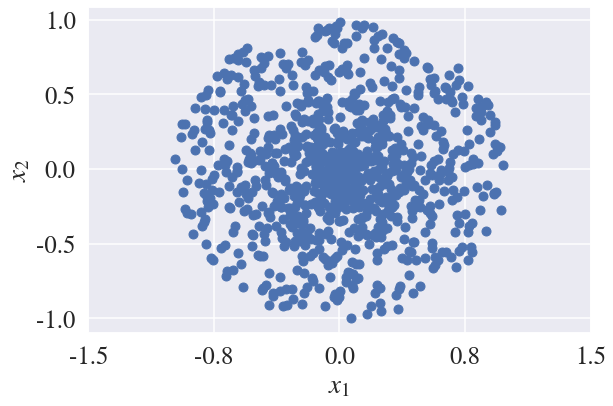

In [3]:
# matplotlib.rcParams['font.size'] = 20
plt.plot(x - np.mean(x),y-np.mean(y),'o')
plt.xticks(np.linspace(-1.5,1.5,num=5))
plt.yticks(np.linspace(-1,1,num=5))
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
#plt.tight_layout()
# plt.grid(True,ls = '--')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig("cloud1.eps")
plt.savefig("cloud1.svg")

In [4]:
def classtwo(num_samples):

    theta = np.linspace(0, 2*np.pi, num_samples)

    # generate the points
    r = np.random.rand((num_samples))
    p = r
    x, y = r * np.cos(theta), r * np.sin(theta)

    r = np.random.rand((num_samples))
    p = r
    x1, y1 = r * np.cos(theta) + 1.5, r * np.sin(theta)

    x1 = np.hstack([x,x1])
    y1 = np.hstack([y,y1])
    
    return x1,y1

x1,y1 = classtwo(500)

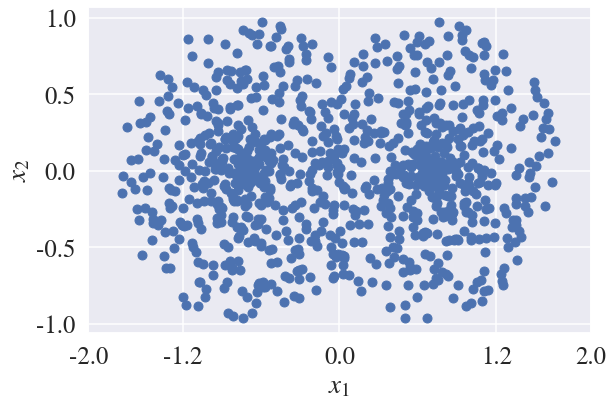

In [5]:
# matplotlib.rcParams['font.size'] = 20
plt.plot(x1-np.mean(x1),y1-np.mean(y1),'o')
plt.xticks([-2,-1.25,0,1.25,2])
plt.yticks(np.linspace(-1,1,num=5))
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
#plt.tight_layout()
# plt.grid(True,ls = '--')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.savefig("cloud2.eps")
plt.savefig("cloud2.svg")

Create each dataset and its corresponding $H_1$ persistence diagram (10 of each)

In [6]:


pointclouds1 = []

for i in range(10):
    x,y = classone(1000)
    pointcloud = np.asarray([x-np.mean(x),y-np.mean(y)]).T
    pointclouds1.append(pointcloud)

pointclouds2 = []
    
for i in range(10):
    x,y = classtwo(500)
    pointcloud = np.asarray([x-np.mean(x),y-np.mean(y)]).T
    pointclouds2.append(pointcloud)  
    
pointclouds = pointclouds1 + pointclouds2



We now develop the persistence diagrams for each class.

In [7]:
os.makedirs("pd", exist_ok=True)
for i in range(20):
    hc.PDList.from_alpha_filtration(pointclouds[i], save_boundary_map=True, save_to="pd{}.idiagram".format(i))

In [8]:
pds = [hc.PDList("pd{}.idiagram".format(i)).dth_diagram(1) for i in (range(20))]

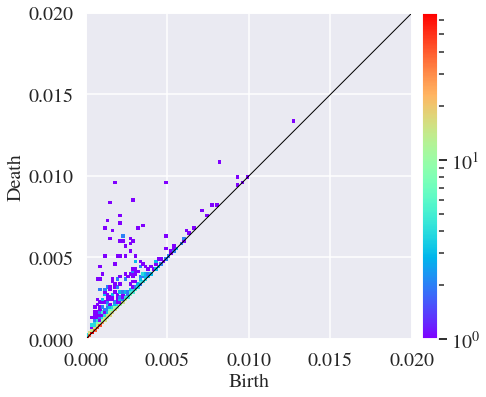

In [9]:
pds[2].histogram(x_range=(0, 0.02)).plot(colorbar={"type": "log"})
plt.savefig("pdcloud1.svg",transparent = True)

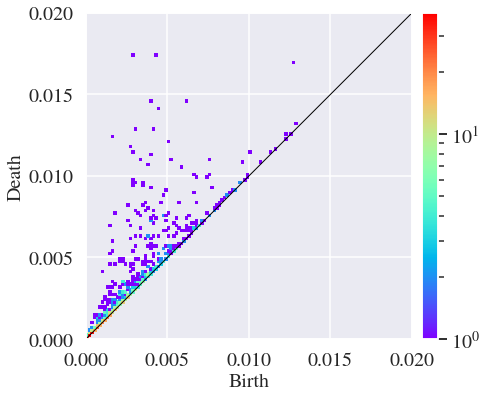

In [10]:
pds[11].histogram(x_range=(0, 0.02)).plot(colorbar={"type": "log"})
plt.savefig("pdcloud2.svg",transparent = True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


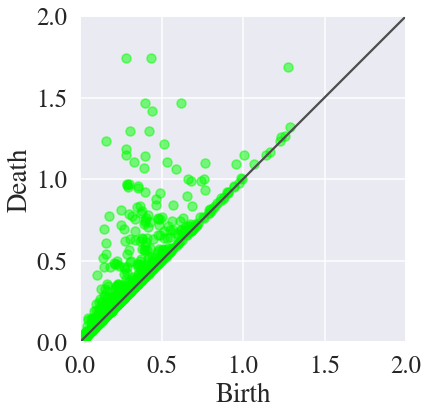

In [11]:
import matplotlib.patches as mpatches
# matplotlib.rcParams['font.size'] = 20
a = pds[11].birth_death_times()
plt.scatter(a[0]*100,a[1]*100,c="lime",alpha = .5)
red_patch = mpatches.Patch(color='lime', label=1)
plt.plot([0,2],[0,2], c=".3")
# plt.legend(handles=[red_patch],loc='lower right')
plt.xlim([0,2])
plt.ylim([0,2])
plt.xticks(np.linspace(0,2,num=5))
plt.yticks(np.linspace(0,2,num=5))
plt.ylabel("Death")
plt.xlabel("Birth")
#plt.tight_layout()
# plt.grid(True,ls = '--')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().set_aspect('equal', adjustable='box')
# sns.set(font_scale = 1)
plt.savefig("pdcloud2.eps")
plt.savefig("pdcloud2.svg")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


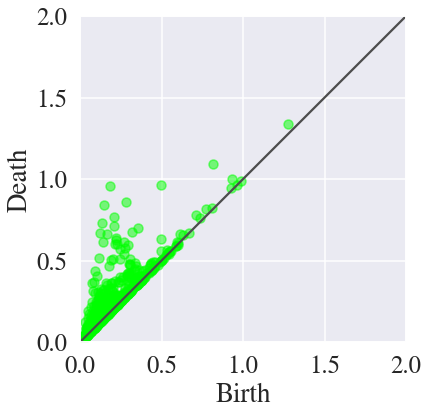

In [12]:
a = pds[2].birth_death_times()


# plt.legend(handles=[red_patch],loc='lower right')
matplotlib.rcParams['font.size'] = 20
plt.scatter(a[0]*100,a[1]*100,c="lime",alpha = .5)
red_patch = mpatches.Patch(color='lime', label=1)
plt.plot([0,2],[0,2], c=".3")
# plt.legend(handles=[red_patch],loc='lower right')
plt.xlim([0,2])
plt.ylim([0,2])
plt.xticks(np.linspace(0,2,num=5))
plt.yticks(np.linspace(0,2,num=5))
plt.ylabel("Death")
plt.xlabel("Birth")
#plt.tight_layout()
# plt.grid(True,ls = '--')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("pdcloud1.eps")
plt.savefig("pdcloud1.svg")

The histograms provide us the quantified information corresponding to the dataset, but we want to be able to utilize this information for Machine Learning Methods such as Classification or Dimensionality Reduction.

We can do this multiple ways, one way is to utilize a diffusion smoothing of the data to make it continuous.

In [13]:
mesh = hc.PIVectorizerMesh((0, 0.02), 128, sigma=0.001, weight=("atan", 0.01, 3))

In [14]:
pdvects = np.vstack([mesh.vectorize(pd) for pd in pds])

In [15]:
pdvects.min(), pdvects.max()

(0.0, 1.9317876687089147e-10)

Want to normalize the PD vectors for efficient calculation

In [16]:
pdvects = pdvects / pdvects.max()

In [17]:
pdvects.min(), pdvects.max()

(0.0, 1.0)

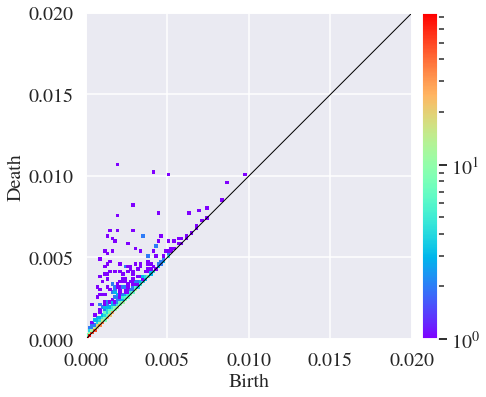

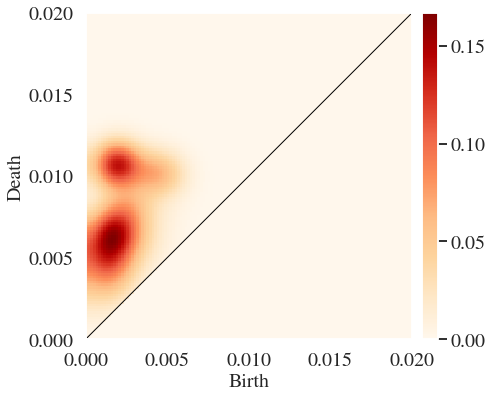

In [18]:
pds[0].histogram(x_range=(0, 0.02)).plot(colorbar={"type": "log"})
mesh.histogram_from_vector(pdvects[0]).plot()
plt.savefig("smoothedcloud.svg",transparent = True)

We can now perform PCA on the vectorized (smoothed) diagrams

In [19]:
pca = PCA(n_components=2)
pca.fit(pdvects)

labels = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


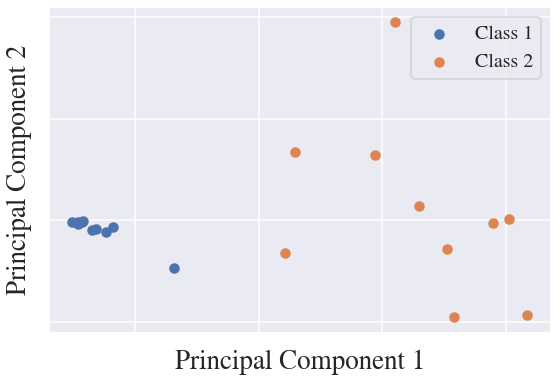

In [20]:
reduced = pca.transform(pdvects)  # Project all vectors into R^2
#plt.gca().set_aspect('equal')  # Set the aspect ratio of the figure
# matplotlib.rcParams['font.size'] = 20
# plt.xticks(np.linspace(-3,9,num=5))
# plt.yticks(np.linspace(-4,7,num=5))
plt.scatter(reduced[0:10,0],reduced[0:10,1],label = "Class 1")
plt.scatter(reduced[10::,0],reduced[10::,1],label = "Class 2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.grid(True,ls = '--')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
# plt.gca().set_aspect('equal', adjustable='box')
plt.legend(fontsize = 20)
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.gca().axes.get_yaxis().set_ticklabels([])
plt.savefig("CloudPCs.eps")
plt.savefig("CloudPCs.svg")

The point clouds are very well separated utilizing this method. 

We can also directly classify these point clouds via simple regression methods such as Logistic Regression

In [21]:
pdvects_train, pdvects_test, labels_train, labels_test = train_test_split(pdvects, labels, test_size=0.3)

In [22]:
model = lm.LogisticRegression(C=1, solver = 'lbfgs')

In [23]:
model.fit(pdvects_train, labels_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
model.score(pdvects_test, labels_test)

1.0

In [25]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

The accuracy is perfect on multiple runs.

Because we are using a linear model, we can extract the coefficients from this classification in order to understand what portions of the persistence diagram this model is utilizing

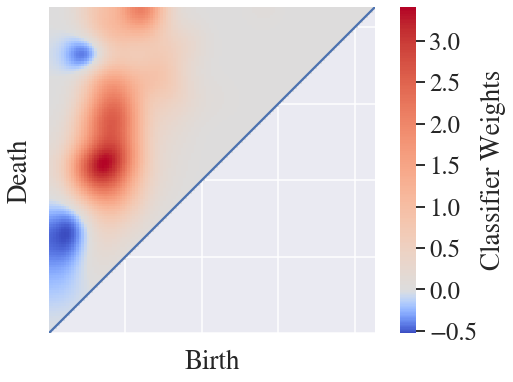

In [26]:
coef = model.coef_.ravel()
fig = plt.figure()
a = mesh.histogram_from_vector(coef).values*100

a[a==0] = np.nan

elev_min = .03*100
elev_max = -.003*100

mask = np.zeros_like(a)

mask[np.triu_indices_from(mask)] = True

sns.axes_style("darkgrid")

plt.plot([0,400],[0,400])

sns.heatmap(a,cmap = "coolwarm",mask=mask,clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=0,vmin=elev_min, vmax=elev_max),cbar_kws={'label': 'Classifier Weights'},square = True)
plt.grid(True)
plt.xticks(np.linspace(0,120,num=5))
plt.yticks(np.linspace(0,120,num=5))

plt.gca().invert_yaxis()
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.gca().axes.get_yaxis().set_ticklabels([])
plt.ylabel("Death")
plt.xlabel("Birth")
plt.savefig("Cloudweights.pdf")
plt.savefig("Cloudweights.svg")

In [27]:
a = mesh.histogram_from_vector(coef).values
np.shape(a)

(128, 128)

In [28]:
red_area = mesh.mask_from_vector(coef > 0.01)
blue_area = mesh.mask_from_vector(coef < -.0005)

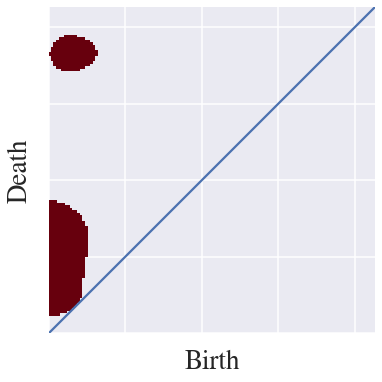

In [29]:
a = blue_area.values*1 + .0000000000000000000001

a[a<1]=  np.nan

fig = plt.figure()
plt.plot([0,400],[0,400])
sns.heatmap(a,cmap = "Reds",vmin = 0, vmax = 1,cbar = False,square = True)
plt.xticks(np.linspace(0,120,num=5))
plt.yticks(np.linspace(0,120,num=5))
plt.grid(True)
# plt.grid(True,ls = '--')
plt.gca().invert_yaxis()
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.gca().axes.get_yaxis().set_ticklabels([])
plt.ylabel("Death")
plt.xlabel("Birth")
plt.savefig("maskweight1.pdf")
plt.savefig("maskweight1.svg")

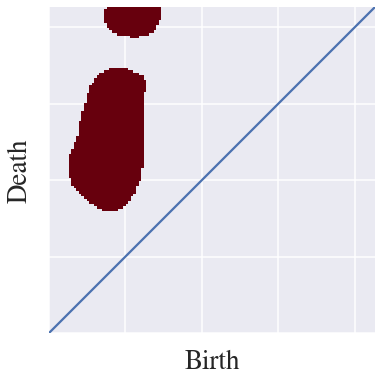

In [30]:
a = red_area.values*1 + .0000000000000000000001

a[a<1]=  np.nan

fig = plt.figure()
plt.plot([0,400],[0,400])
sns.heatmap(a,cmap = "Reds",vmin = 0, vmax = 1,cbar = False,square = True)
plt.xticks(np.linspace(0,120,num=5))
plt.yticks(np.linspace(0,120,num=5))
plt.grid(True)
plt.gca().invert_yaxis()
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.gca().axes.get_yaxis().set_ticklabels([])
plt.ylabel("Death")
plt.xlabel("Birth")
plt.savefig("maskweight2.pdf")
plt.savefig("maskweight2.svg")

We can see from this that the positive class ('red') is associated with having cycles that seem to persist for a longer period of time and are born later than those of the negative class ('blue'). 'Blue' seems to have a higher concentration of cycles that have a short life span.

With this information, we can now project back into our datasets in order to understand exact what is causing these differences.

In [31]:
pairs_in_blue_100 = blue_area.filter_pairs(pds[19].pairs())
pairs_in_red_100 = red_area.filter_pairs(pds[19].pairs())

pairs_in_blue_0 = blue_area.filter_pairs(pds[0].pairs())
pairs_in_red_0 = red_area.filter_pairs(pds[0].pairs())

In [32]:
len(pairs_in_blue_0), len(pairs_in_red_0), len(pairs_in_blue_100), len(pairs_in_red_100)

(168, 5, 120, 27)

This is interesting as we can see exactly why this classification is so accurate given the number of pairs associated with each highlighted area...


But now that we had identified the topological structures that are associated with each class, we want to visualize what those look like in our given dataset.

In [33]:
optimal_volumes_blue_0 = [pair.optimal_volume(cutoff_radius=0.4) for pair in pairs_in_blue_0]
optimal_volumes_red_100 = [pair.optimal_volume(cutoff_radius=0.4) for pair in pairs_in_red_100]
optimal_volumes_blue_100 = [pair.optimal_volume(cutoff_radius=0.4) for pair in pairs_in_blue_100]
optimal_volumes_red_0 = [pair.optimal_volume(cutoff_radius=0.4) for pair in pairs_in_red_0]

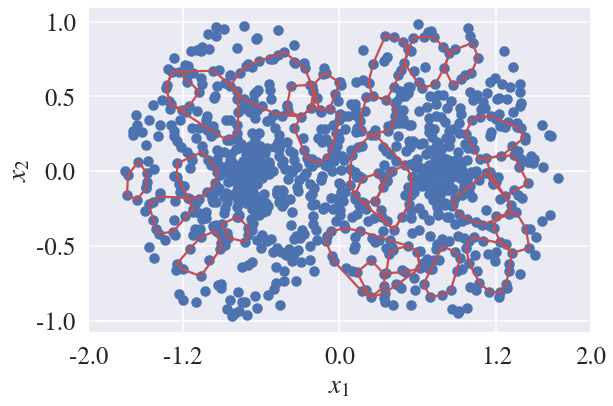

In [36]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
plt.scatter(pointclouds[19][:,0],pointclouds[19][:,1],label = "Data")

j = 0

for i in range(len(optimal_volumes_red_100)):
    a = np.vstack(optimal_volumes_red_100[i].boundary_points())
    hull = ConvexHull(a)
    for simplex in hull.simplices:
        plt.plot(a[simplex, 0], a[simplex, 1], 'r-',label="1-Cycles" if j==0 else "")
        j += 1

plt.xticks([-2,-1.25,0,1.25,2])
plt.yticks(np.linspace(-1,1,num=5))
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
#plt.tight_layout()
# plt.grid(True,ls = '--')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
# plt.savefig("cloud2.eps",transparent = True)
# plt.savefig("cloud2.svg",transparent = True)

plt.savefig("cyclescloud2.eps")
plt.savefig("cyclescloud2.svg")

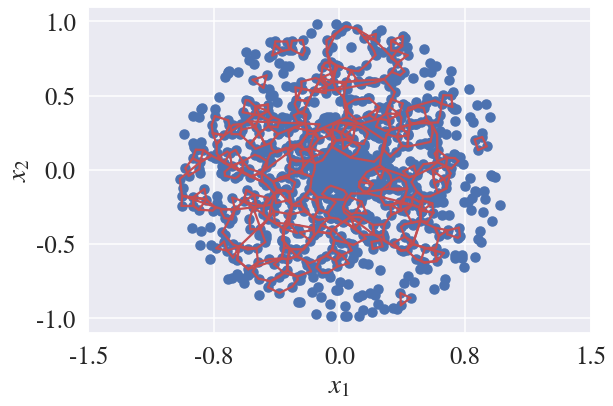

In [37]:

plt.scatter(pointclouds[0][:,0],pointclouds[0][:,1],label = "Data")

j = 0

for i in range(len(optimal_volumes_blue_0)):
    a = np.vstack(optimal_volumes_blue_0[i].boundary_points())
    hull = ConvexHull(a)
    for simplex in hull.simplices:
        plt.plot(a[simplex, 0], a[simplex, 1], 'r-',label="1-Cycles" if j==0 else "")
        j += 1

plt.xticks(np.linspace(-1.5,1.5,num=5))
plt.yticks(np.linspace(-1,1,num=5))
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
#plt.tight_layout()
# plt.grid(True,ls = '--')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}')) # 2 decimal places

plt.savefig("cyclescloud1.eps")
plt.savefig("cyclescloud1.svg")